In [6]:
#import most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Downloads/Stock Vertex Ventures/fo01Dec2022bhav.csv')
print(df.head())

  INSTRUMENT     SYMBOL    EXPIRY_DT  STRIKE_PR OPTION_TYP      OPEN     HIGH   
0     FUTIDX  BANKNIFTY  29-Dec-2022        0.0         XX  43680.40  43699.0  \
1     FUTIDX  BANKNIFTY  25-Jan-2023        0.0         XX  43890.70  43939.4   
2     FUTIDX  BANKNIFTY  23-Feb-2023        0.0         XX  44129.95  44170.8   
3     FUTIDX   FINNIFTY  27-Dec-2022        0.0         XX  19571.75  19596.4   
4     FUTIDX   FINNIFTY  31-Jan-2023        0.0         XX  19644.90  19644.9   

       LOW     CLOSE  SETTLE_PR  CONTRACTS  VAL_INLAKH  OPEN_INT  CHG_IN_OI   
0  43323.0  43475.15   43475.15     119513  1300756.64   2808250     -13300  \
1  43600.0  43735.80   43735.80       3771    41290.02    291025       1175   
2  43816.8  43961.35   43961.35       1122    12352.62     21625       3675   
3  19456.2  19499.70   19499.70        176     1373.53      6720       -200   
4  19644.9  19644.90   19585.20          2       15.71       320        -80   

     TIMESTAMP  Unnamed: 15  
0  01-DE

In [8]:
#check data information
print(df.size)
print(df.ndim)
print(df.shape)
print(df.dtypes)

842528
2
(52658, 16)
INSTRUMENT      object
SYMBOL          object
EXPIRY_DT       object
STRIKE_PR      float64
OPTION_TYP      object
OPEN           float64
HIGH           float64
LOW            float64
CLOSE          float64
SETTLE_PR      float64
CONTRACTS        int64
VAL_INLAKH     float64
OPEN_INT         int64
CHG_IN_OI        int64
TIMESTAMP       object
Unnamed: 15    float64
dtype: object


In [9]:
#data analysis for understand dataset
df.describe()

,STRIKE_PR,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,Unnamed: 15
count,52658.000000,52658.000000,52658.000000,52658.000000,52658.000000,52658.000000,5.265800e+04,5.265800e+04,5.265800e+04,5.265800e+04,0.0
mean,5416.460177,58.326950,60.375666,56.516923,449.921304,711.126527,5.998336e+03,6.134360e+04,1.683519e+05,4.057098e+03,NaN
std,12036.320974,1012.810409,1026.410002,1007.908939,1731.194431,3551.623248,2.317454e+05,2.404106e+06,3.415573e+06,1.365178e+05,NaN
min,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-7.835400e+06,NaN
25%,350.000000,0.000000,0.000000,0.000000,11.950000,7.400000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,1060.000000,0.000000,0.000000,0.000000,57.500000,49.100000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,3400.000000,0.000000,0.000000,0.000000,258.375000,246.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
max,109500.000000,93992.800000,95657.200000,93833.300000,94765.200000,94765.200000,1.757302e+07,1.875094e+08,5.169500e+08,8.876650e+06,NaN


In [10]:
df.columns

Index(['INSTRUMENT', 'SYMBOL', 'EXPIRY_DT', 'STRIKE_PR', 'OPTION_TYP', 'OPEN',
       'HIGH', 'LOW', 'CLOSE', 'SETTLE_PR', 'CONTRACTS', 'VAL_INLAKH',
       'OPEN_INT', 'CHG_IN_OI', 'TIMESTAMP', 'Unnamed: 15'],
      dtype='object')

In [11]:
# Convert the CLOSE column to numeric if needed
df['CLOSE'] = pd.to_numeric(df['CLOSE'], errors='coerce')

      INSTRUMENT     SYMBOL    EXPIRY_DT  STRIKE_PR OPTION_TYP      OPEN   
0         FUTIDX  BANKNIFTY  29-Dec-2022        0.0         XX  43680.40  \
1         FUTIDX  BANKNIFTY  25-Jan-2023        0.0         XX  43890.70   
2         FUTIDX  BANKNIFTY  23-Feb-2023        0.0         XX  44129.95   
3         FUTIDX   FINNIFTY  27-Dec-2022        0.0         XX  19571.75   
4         FUTIDX   FINNIFTY  31-Jan-2023        0.0         XX  19644.90   
...          ...        ...          ...        ...        ...       ...   
52653     OPTSTK  ZYDUSLIFE  23-Feb-2023      450.0         PE      0.00   
52654     OPTSTK  ZYDUSLIFE  23-Feb-2023      455.0         PE      0.00   
52655     OPTSTK  ZYDUSLIFE  23-Feb-2023      460.0         PE      0.00   
52656     OPTSTK  ZYDUSLIFE  23-Feb-2023      465.0         PE      0.00   
52657     OPTSTK  ZYDUSLIFE  23-Feb-2023      470.0         PE      0.00   

          HIGH      LOW     CLOSE  SETTLE_PR  CONTRACTS  VAL_INLAKH  OPEN_INT   
0     

In [ ]:
# Calculate the average close price for the month
average_close_price = df['CLOSE'].mean()

In [ ]:
# Create a new column and initialize with empty values
df['comparison'] = ''

# Iterate through each row and compare close prices
for index, row in df.iterrows():
    if row['CLOSE'] > average_close_price:
        df.at[index, 'comparison'] = 'Greater'
    else:
        df.at[index, 'comparison'] = 'Less'

In [13]:
# Save the modified dataframe as a CSV file
df.to_csv('modified_dataset.csv', index=False)

# Display the modified dataframe
print(df)

      INSTRUMENT     SYMBOL    EXPIRY_DT  STRIKE_PR OPTION_TYP      OPEN   
0         FUTIDX  BANKNIFTY  29-Dec-2022        0.0         XX  43680.40  \
1         FUTIDX  BANKNIFTY  25-Jan-2023        0.0         XX  43890.70   
2         FUTIDX  BANKNIFTY  23-Feb-2023        0.0         XX  44129.95   
3         FUTIDX   FINNIFTY  27-Dec-2022        0.0         XX  19571.75   
4         FUTIDX   FINNIFTY  31-Jan-2023        0.0         XX  19644.90   
...          ...        ...          ...        ...        ...       ...   
52653     OPTSTK  ZYDUSLIFE  23-Feb-2023      450.0         PE      0.00   
52654     OPTSTK  ZYDUSLIFE  23-Feb-2023      455.0         PE      0.00   
52655     OPTSTK  ZYDUSLIFE  23-Feb-2023      460.0         PE      0.00   
52656     OPTSTK  ZYDUSLIFE  23-Feb-2023      465.0         PE      0.00   
52657     OPTSTK  ZYDUSLIFE  23-Feb-2023      470.0         PE      0.00   

          HIGH      LOW     CLOSE  SETTLE_PR  CONTRACTS  VAL_INLAKH  OPEN_INT   
0     

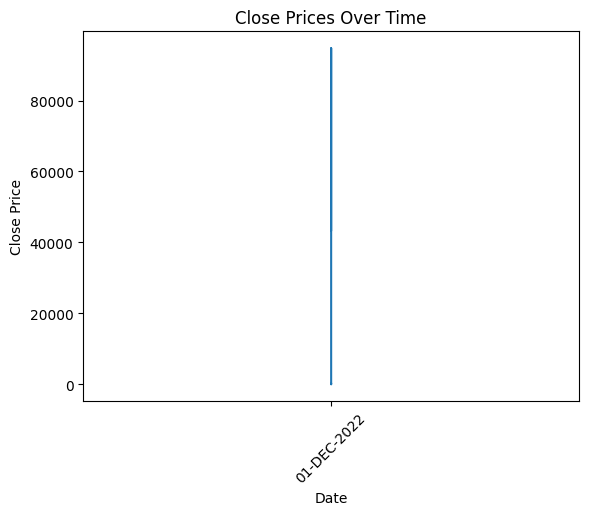

In [14]:
# Load the modified dataset into a dataframe
df = pd.read_csv('modified_dataset.csv')

# Plot the close prices over time
plt.plot(df['TIMESTAMP'], df['CLOSE'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices Over Time')
plt.xticks(rotation=45)
plt.show()
